# Noise measurement

In this example, we will demonstrate how to make an estiation of noise per electrode along days.

The recording system is Blackrock. We will use only the ns5 files.


In [1]:
# this is for debuging
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# some imports
from pathlib import Path
import shutil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import spikeinterface.full as si

In [24]:
# the path where we want to run the spike sorting
base_folder = Path("/home/samuel/DataSpikeSorting/WIRED_SI_tutos/")
blackrock_folders = base_folder / "Blackrock"


In [25]:

noise_levels_per_day = []
days = [2, 3, 4]
recordings = {}
for day in days:
    bl_folder = blackrock_folders / f"day{day}"

    # find the ns6 file in folder
    ns5_file = next(bl_folder.glob("*.ns5"))
    print()
    print(f"day{day}", ns5_file.stem)

    # read the ns6 file (micro electrodes)
    rec = si.read_blackrock(ns5_file)
    # keep only 24 channels (6 tetrodes)
    rec = rec.channel_slice(channel_ids=rec.channel_ids[:24])
    recordings[day] = rec
    





day2 SmdlmHZkEDJkHfG_20180612-154446-001

day3 SmdlmHZkEDJkHfG_20180613-160451-001

day4 SmdlmHZkEDJkHfG_20180614-160322-001


## lets compute raw noises with MAD

In [26]:
noise_levels = []
for day, rec in recordings.items():
    noise_levels_of_day = si.get_noise_levels(rec, return_scaled=True)
    print(noise_levels_of_day)
    noise_levels.append(noise_levels_of_day)
noise_levels = np.stack(noise_levels)

raw_noises = pd.DataFrame(noise_levels, columns=rec.channel_ids, index=days)
raw_noises.index.name = "day"
raw_noises.columns.name = "channel_id"
raw_noises


[ 86.73223   52.26173   54.485634  48.555225  69.682304  71.53556
  75.61272   70.42361   98.9637    78.57792   85.62028   73.01816
  69.31165   69.31165   69.31165   70.42361   67.458405  67.08775
 103.040855  60.04539   58.56279   55.597584  51.149776  55.968235]
[106.00606   62.639946  88.95614   58.93344   61.15734   63.381245
  74.50076   66.7171    64.493195  71.16491   82.655075  64.863846
  70.052956  72.64751   61.15734   65.9758    64.863846  73.38881
 117.12558   60.04539   56.338886  58.56279   57.450836  55.597584]
[101.18761   61.15734   62.269295  57.450836  69.31165   70.42361
  74.13011   74.50076   65.2345   100.816956  99.705     77.83662
  94.88654   82.655075  63.010597  95.257195 137.1407    93.033295
  87.47353   86.36158   81.54312   78.57792   82.655075  71.90621 ]


channel_id,1,2,3,4,5,6,7,8,17,18,...,23,24,33,34,35,36,37,38,39,40
day,,,,,,,,,,,,,,,,,,,,,
2,86.732231,52.261730,54.485634,48.555225,69.682304,71.535561,75.612717,70.423607,98.963699,78.577919,...,69.311653,70.423607,67.458405,67.087753,103.040855,60.045391,58.562790,55.597584,51.149776,55.968235
3,106.006058,62.639946,88.956139,58.933441,61.157341,63.381245,74.500763,66.717102,64.493195,71.164909,...,61.157341,65.975800,64.863846,73.388809,117.125580,60.045391,56.338886,58.562790,57.450836,55.597584
4,101.187607,61.157341,62.269295,57.450836,69.311653,70.423607,74.130112,74.500763,65.234497,100.816956,...,63.010597,95.257195,137.140701,93.033295,87.473534,86.361580,81.543121,78.577919,82.655075,71.906212


(0.0, 150.0)

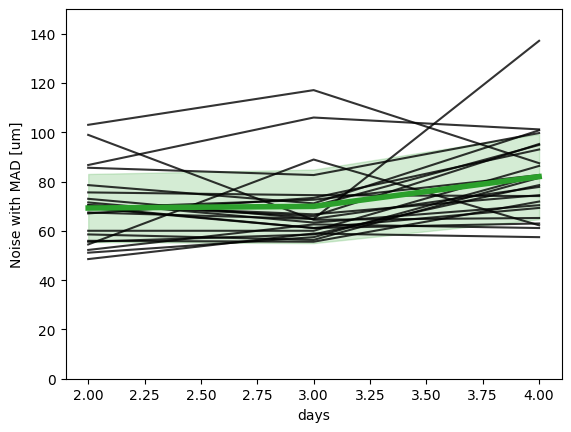

In [31]:
fig, ax = plt.subplots()
ax.plot(days, raw_noises, color='k', alpha=0.8)
m = np.mean(raw_noises, axis=1)
s = np.std(raw_noises, axis=1)
ax.plot(days, m, color='C2', lw=4)
ax.fill_between(days, m-s,m+s, color='C2', alpha=0.2)
ax.set_xlabel('days')
ax.set_ylabel('Noise with MAD [um]')
ax.set_ylim(0, 150)


## Noises levels on filtered and CMR



In [33]:
noise_levels = []
for day, rec in recordings.items():
    rec_preprocessed = si.bandpass_filter(rec, freq_min=300., freq_max=8000.)
    rec_preprocessed = si.common_reference(rec_preprocessed, operator='median')
    

    
    noise_levels_of_day = si.get_noise_levels(rec_preprocessed, return_scaled=True)
    print(noise_levels_of_day)
    noise_levels.append(noise_levels_of_day)
noise_levels = np.stack(noise_levels)

preprocessed_noises = pd.DataFrame(noise_levels, columns=rec.channel_ids, index=days)
preprocessed_noises.index.name = "day"
preprocessed_noises.columns.name = "channel_id"
preprocessed_noises

[4.818457  4.447807  4.818457  4.077156  4.447807  4.818457  4.818457
 4.818457  5.930409  6.3010597 6.3010597 6.3010597 5.189108  5.189108
 4.818457  5.189108  5.5597587 6.3010597 7.042361  5.5597587 5.5597587
 5.5597587 5.189108  5.189108 ]
[4.447807  4.447807  5.189108  4.077156  4.447807  5.189108  4.818457
 4.818457  5.189108  5.930409  5.189108  5.189108  4.818457  5.189108
 4.818457  5.189108  5.930409  6.3010597 8.895614  6.3010597 5.189108
 5.189108  5.189108  4.818457 ]
[5.930409  4.818457  5.189108  4.077156  4.818457  5.5597587 4.818457
 6.3010597 5.189108  6.67171   5.189108  5.5597587 5.189108  5.189108
 4.818457  5.189108  6.67171   7.042361  8.895614  6.67171   5.930409
 6.3010597 6.3010597 5.930409 ]


channel_id,1,2,3,4,5,6,7,8,17,18,...,23,24,33,34,35,36,37,38,39,40
day,,,,,,,,,,,,,,,,,,,,,
2,4.818457,4.447807,4.818457,4.077156,4.447807,4.818457,4.818457,4.818457,5.930409,6.301060,...,4.818457,5.189108,5.559759,6.301060,7.042361,5.559759,5.559759,5.559759,5.189108,5.189108
3,4.447807,4.447807,5.189108,4.077156,4.447807,5.189108,4.818457,4.818457,5.189108,5.930409,...,4.818457,5.189108,5.930409,6.301060,8.895614,6.301060,5.189108,5.189108,5.189108,4.818457
4,5.930409,4.818457,5.189108,4.077156,4.818457,5.559759,4.818457,6.301060,5.189108,6.671710,...,4.818457,5.189108,6.671710,7.042361,8.895614,6.671710,5.930409,6.301060,6.301060,5.930409


(0.0, 12.0)

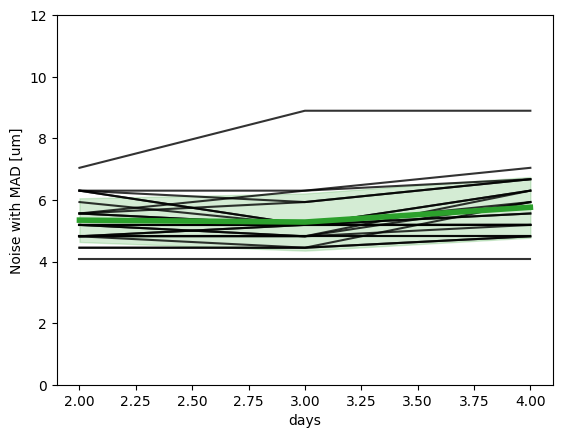

In [36]:
fig, ax = plt.subplots()
ax.plot(days, preprocessed_noises, color='k', alpha=0.8)
m = np.mean(preprocessed_noises, axis=1)
s = np.std(preprocessed_noises, axis=1)
ax.plot(days, m, color='C2', lw=4)
ax.fill_between(days, m-s,m+s, color='C2', alpha=0.2)
ax.set_xlabel('days')
ax.set_ylabel('Noise with MAD [um]')
ax.set_ylim(0, 12)